## Seaborn tutorial 1

### Resources:
- http://seaborn.pydata.org/tutorial

Matplotlib is highly customizable, but it can be hard to know what settings to tweak to achieve an attractive plot. Seaborn comes with a number of customized themes and a high-level interface for controlling the look of matplotlib figures.

### Example:

In [118]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(sum(map(ord, 'aesthetics')))

In [119]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1,7):
        plt.plot(x, np.sin(x+i*0.5)*(7-i)*flip)

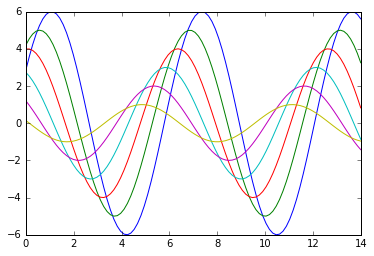

In [3]:
sinplot()

To switch to seaborn defaults, simply import the package.

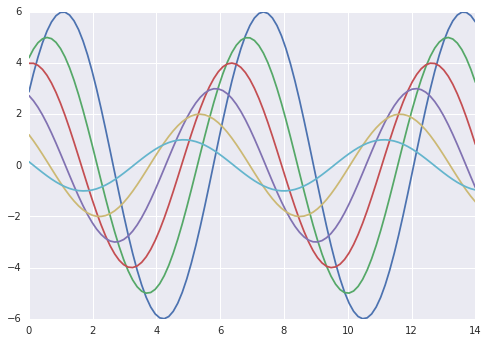

In [4]:
import seaborn as sns
sinplot()

## 1-Style functions
Seaborn splits matplotlib parameters into two independent groups. The first group sets the __aesthetic style__ of the plot, and the second __scales__ various elements of the figure so that it can be easily incorporated into different contexts.

The interface for manipulating these parameters are two pairs of functions. To control the style, use the __axes_style()__ and __set_style()__ functions. To scale the plot, use the __plotting_context()__ and __set_context()__ functions. In both cases, the first function returns a dictionary of parameters and the second sets the matplotlib defaults.

### Styling figures with *axes_style()* and *set_style()*

__There are five preset seaborn themes:__
- **darkgrid**(default)
- **whitegrid**
- **dark**
- **white**
- **ticks**

In [5]:
boxdata = np.random.normal(size=(20,6)) + np.arange(6)/2

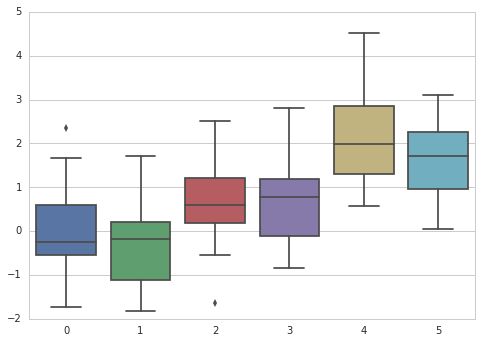

In [6]:
sns.set_style('whitegrid')
sns.boxplot(data=boxdata)

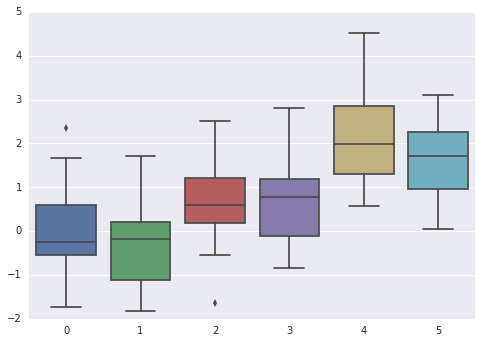

In [8]:
sns.set_style('darkgrid')
sns.boxplot(data=boxdata)

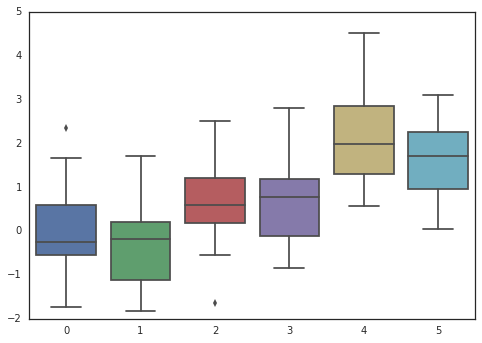

In [9]:
sns.set_style('white')
sns.boxplot(data=boxdata)

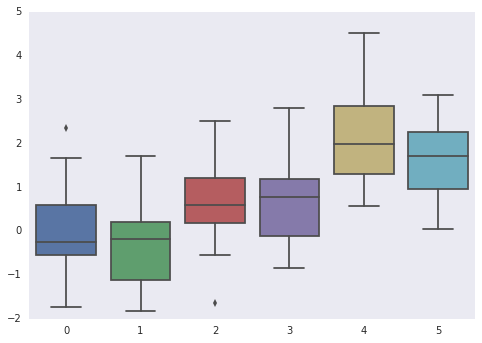

In [10]:
sns.set_style('dark')
sns.boxplot(data=boxdata)

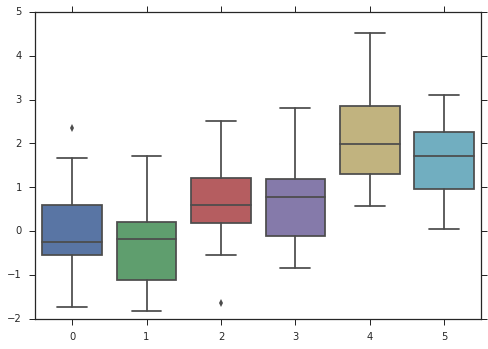

In [11]:
sns.set_style('ticks')
sns.boxplot(data=boxdata)

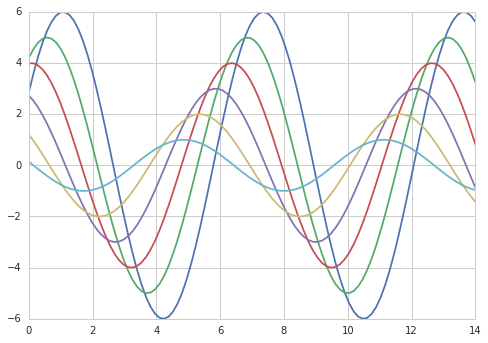

In [12]:
sns.set_style('whitegrid')
sinplot()

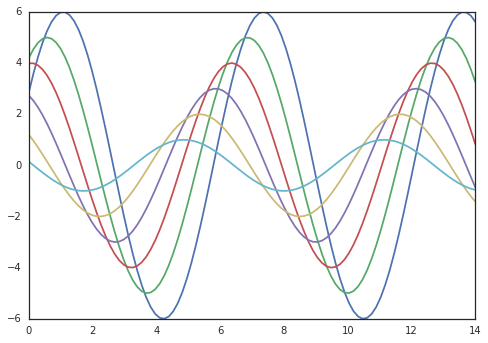

In [13]:
sns.set_style('white')
sinplot()

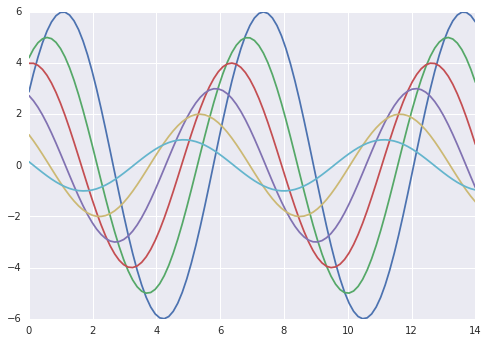

In [14]:
sns.set_style('darkgrid')
sinplot()

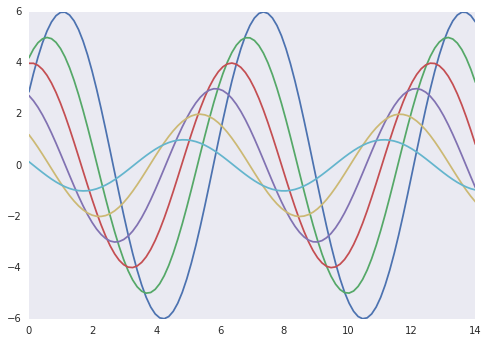

In [15]:
sns.set_style('dark')
sinplot()

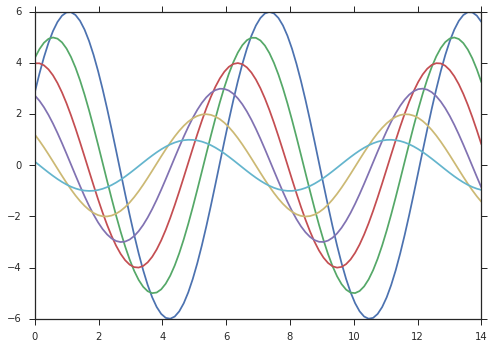

In [16]:
sns.set_style('ticks')
sinplot()

### Removing spines wtih *despine()*:

Both the white and ticks styles can benefit from removing the top and right axes spines, which are not needed. It’s impossible to do this through the matplotlib parameters, but you can call the seaborn function despine() to remove them:

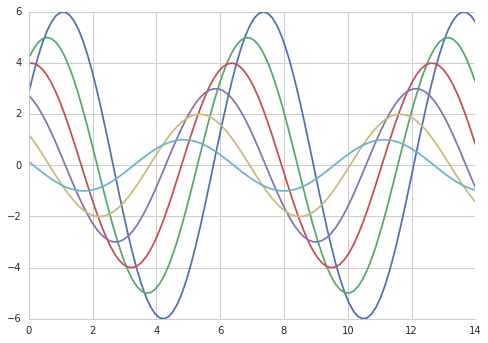

In [21]:
sinplot()
sns.set_style("white")
sns.despine()

Some plots benefit from offsetting the spines away from the data, which can also be done when calling despine(). When the ticks don’t cover the whole range of the axis, the trim parameter will limit the range of the surviving spines.

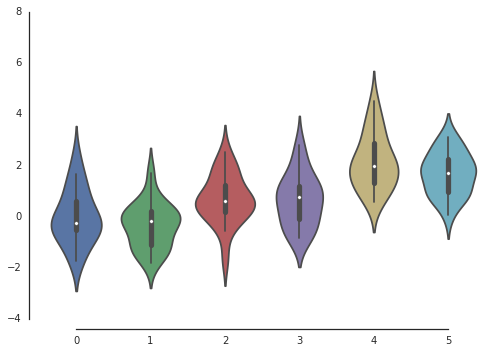

In [22]:
fig, ax = plt.subplots()
sns.violinplot(data=boxdata)
sns.despine(offset=10, trim=True)

You can also control which spines are removed with additional arguments to despine():

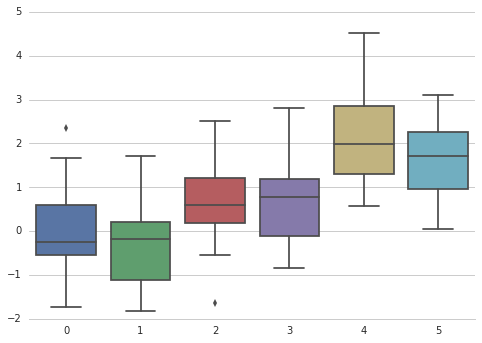

In [23]:
sns.set_style('whitegrid')
sns.boxplot(data=boxdata, palette='deep')
sns.despine(left=True)

### Temporarily setting figure style

Although it’s easy to switch back and forth, you can also use the axes_style() function in a with statement to temporarily set plot parameters. This also allows you to make figures with differently-styled axes:

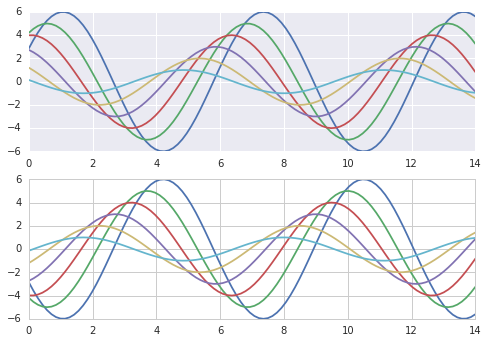

In [25]:
with sns.axes_style('darkgrid'):
    plt.subplot(211)
    sinplot()

plt.subplot(212)
sinplot(-1)

### Scaling plot elements with *plotting_context()* and *set_context()*
A separate set of parameters control the scale of plot elements, which should let you use the same code to make plots that are suited for use in settings where larger or smaller plots are appropriate.

__The four preset contexts, in order of relative size:__
- paper
- notebook
- talk 
- poster

First let’s reset the default parameters by calling set():

In [26]:
sns.set()

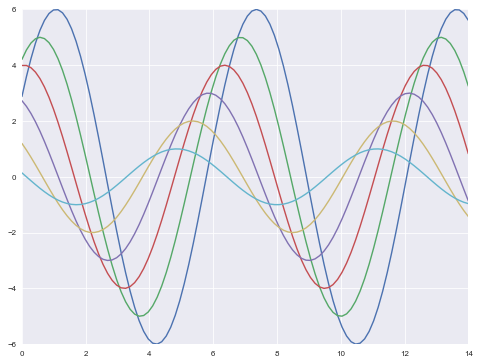

In [27]:
sns.set_context('paper')
plt.figure(figsize=(8,6))
sinplot()

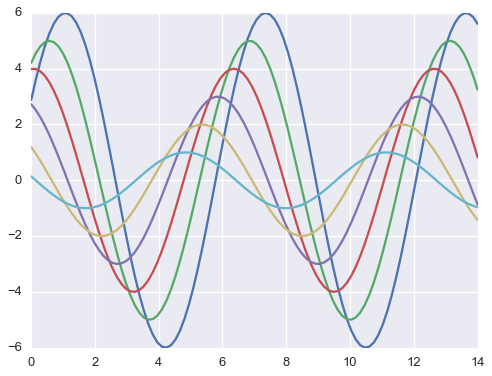

In [160]:
sns.set_context('talk')
plt.figure(figsize=(8,6))
sinplot()

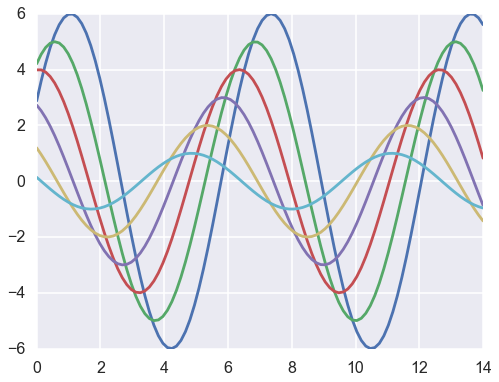

In [161]:
sns.set_context('poster')
plt.figure(figsize=(8,6))
sinplot()

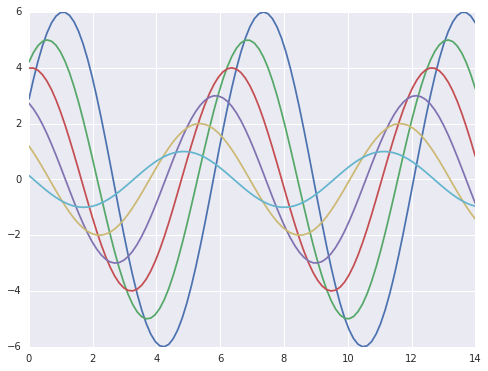

In [28]:
sns.set_context('notebook')
plt.figure(figsize=(8,6))
sinplot()

You can call set_context() with one of these names to set the parameters, and you can override the parameters by providing a dictionary of parameter values.

You can also independently scale the size of the font elements when changing the context. (This option is also available through the top-level set() function).

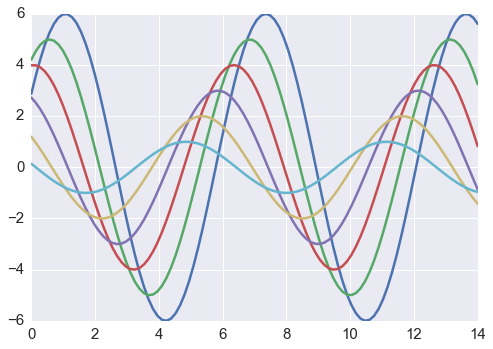

In [29]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sinplot()

### Overriding elements of the seaborn styles
If you want to customize the seaborn styles, you can pass a dictionary of parameters to the rc argument of axes_style() and set_style(). Note that you can only override the parameters that are part of the style definition through this method. (However, the higher-level set() function takes a dictionary of any matplotlib parameters).

If you want to see what parameters are included, you can just call the function with no arguments, which will return the current settings:

In [115]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': 'white',
 'axes.facecolor': '#EAEAF2',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 0.0,
 'figure.facecolor': 'white',
 'font.family': [u'sans-serif'],
 'font.sans-serif': [u'Arial',
  u'Liberation Sans',
  u'Bitstream Vera Sans',
  u'sans-serif'],
 'grid.color': 'white',
 'grid.linestyle': u'-',
 'image.cmap': u'Greys',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': u'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': u'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': u'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}

In [116]:
sns.plotting_context()

{'axes.labelsize': 11.0,
 'axes.titlesize': 12.0,
 'figure.figsize': [6.0, 6.0],
 'font.size': 12.0,
 'grid.linewidth': 1.0,
 'legend.fontsize': 10.0,
 'lines.linewidth': 1.75,
 'lines.markeredgewidth': 0.0,
 'lines.markersize': 7.0,
 'patch.linewidth': 0.3,
 'xtick.labelsize': 10.0,
 'xtick.major.pad': 7.0,
 'xtick.major.width': 1.0,
 'xtick.minor.width': 0.5,
 'ytick.labelsize': 10.0,
 'ytick.major.pad': 7.0,
 'ytick.major.width': 1.0,
 'ytick.minor.width': 0.5}

## 2-Color palettes
The most important function for working with discrete color palettes is __color_palette()__. This function provides an interface to many (though not all) of the possible ways you can generate colors in seaborn, and it’s used internally by any function that has a palette argument (and in some cases for a color argument when multiple colors are needed).

__color_palette()__ will accept the name of any seaborn palette or matplotlib colormap (except jet, which you should never use). It can also take a list of colors specified in any valid matplotlib format (RGB tuples, hex color codes, or HTML color names). The return value is always a list of RGB tuples.



It is generally not possible to know what kind of color palette or colormap is best for a set of data without knowing about the characteristics of the data. Following that, we’ll break up the different ways to use __color_palette()__ and other seaborn palette functions by the three general kinds of color palettes: 
- __qualitative__ (default)
- __sequential__
- __diverging__

## Main APIs:
- __color_palette():__

A. Calling __color_palette()__ with no arguments will return the current default color cycle.

B. Using __color_palette()__ in a with statement to temporarily change the default palette (see below).
 
 
- __set_palette():__

A. A corresponding function, __set_palette()__, takes the same arguments and will set the default color cycle for all plots.

- __palplot():__

plotting a color palette passed as its argument.


## Specific APIs:

### Qualitative palette:

- __HLS:__

    A. __color_platte('hls')__
    
    B. __hls_platte()__
    

- __HUSL:__

    A. __color_platte('husl')__
    
    B. __husl_platte()__
    

- __Color Brewer:__

    A. __color_palette('paired')__    or    __color_palette('set2')__
    

- __xkcd:__

    A. __xkcd_rgb['xkcd_name']__ as a color in all functins such as __plt.plot(color=xkcd_rgb['xkcd_name'])__
    
    B. __xkcd_palette('xkcd_name')__


- __own set:__

    A. creating __color_list__ and pass it to __color_palette(color_list)__
    
    the list could be contained: __matplotlib colors__, __xkcd_color names__, __color codes__, __HTML color names__


### Sequential palette:

- __Custom:__

- __Cubehelix:__

    A. __color_palette('cubehelix')__
    
    B. __cubehelix_palette()__
    

- __light_palette:__

    A. __light_palette()__
    

- __dark_palette:__

    B. __dark_palette()__



### Diverging palette:

- __Custom:__

    A. __color_palette('diverging_color_name')__ ;where  __'diverging_color_name':__  __'BrBG'__ , __'RdBu'__ , __'coolwarm'__


- __diverging_palette:__

    A. __diverging_palette()__
    
### Interactive APIs:

- __choose_colorbrewer_palette()__
- __choose_cubehelix_palette()__
- __choose_light_palette()__
- __choose_dark_palette()__
- __choose_diverging_palette()__


### Qualitative color palettes

Qualitative (or categorical) palettes are best when you want to distinguish discrete chunks of data that do not have an inherent ordering.

In [120]:
sns.set(rc={"figure.figsize": (6, 6)})

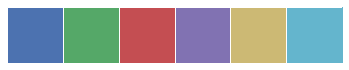

In [131]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

__Using circular color systems:__

When you have more than six categories to distinguish, the easiest thing is to draw evenly-spaced colors in a circular color space (such that the hue changes which keeping the brightness and saturation constant)

__hls Palette__

__2 ways for create a hsl palette:__

1. passing __'hls'__ and its params to __color_palette()__
2. using __hls_palette()__

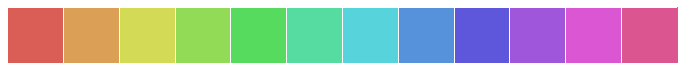

In [136]:
sns.palplot(sns.color_palette('hls', 12))

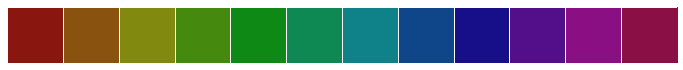

In [137]:
sns.palplot(sns.hls_palette(12, l=0.3, s=0.8))

__husl Palette:__

However, because of the way the human visual system works, colors that are even “intensity” in terms of their RGB levels won’t necessarily look equally intense. We perceive yellows and greens as relatively brighter and blues as relatively darker, which can be a problem when aiming for uniformity with the hls system.

To remedy this, seaborn provides an interface to the husl system, which also makes it easy to select evenly spaced hues while keeping the apparent brightness and saturation much more uniform.

__2 ways for create a hsl palette:__
1. passing __'huls'__ and its params to __color_palette()__
2. using __huls_palette()__

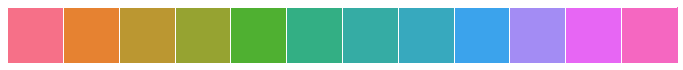

In [138]:
sns.palplot(sns.color_palette("husl", 12))

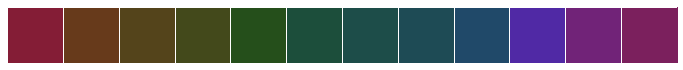

In [139]:
sns.palplot(sns.husl_palette(12, l=0.3, s=0.8))

__Using categorical Color Brewer palettes__

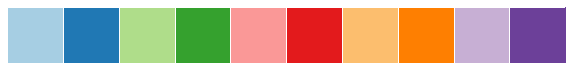

In [143]:
sns.palplot(sns.color_palette('Paired', 10))

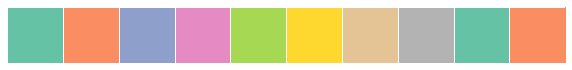

In [72]:
sns.palplot(sns.color_palette('Set2', 10))

__Using your color set__

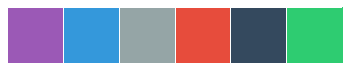

In [41]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))

__Using named colors from the xkcd color survey__

A while back, xkcd ran a crowdsourced effort to name random RGB colors. This produced a set of 954 named colors, which you can now reference in seaborn using the xkcd_rgb dictionary:

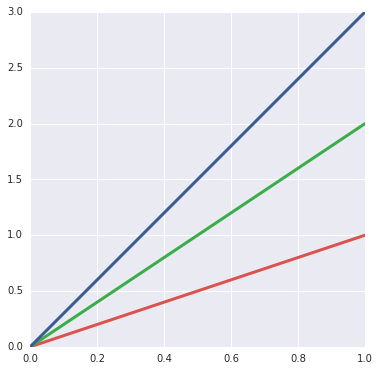

In [42]:
plt.plot([0, 1], [0, 1], sns.xkcd_rgb["pale red"], lw=3)
plt.plot([0, 1], [0, 2], sns.xkcd_rgb["medium green"], lw=3)
plt.plot([0, 1], [0, 3], sns.xkcd_rgb["denim blue"], lw=3);

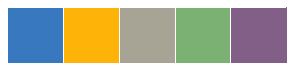

In [147]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))

### Sequential color palettes

This kind of color mapping is appropriate when data range from relatively low or unintersting values to relatively high or interesting values. Although there are cases where you will want discrete colors in a sequential palette, it’s more common to use them as a colormap in functions like __kdeplot()__ or __corrplot()__ (along with similar matplotlib functions).


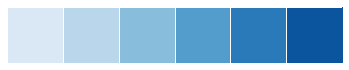

In [148]:
sns.palplot(sns.color_palette('Blues'))

__to reverse the colormap use '_r':__

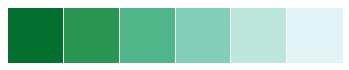

In [149]:
sns.palplot(sns.color_palette('BuGn_r'))

__dark colormap using '_d'__

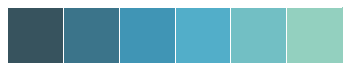

In [150]:
sns.palplot(sns.color_palette('GnBu_d'))

__Sequential palettes with **cubehelix_palette()**__

The cubehelix color palette system makes sequential palettes with a linear increase or decrease in brightness and some variation in hue. This means that the information in your colormap will be preserved when converted to black and white (for printing) or when viewed by a colorblind individual.

__2 ways for create a cubehelix palette:__
1. passing '__cubehelix__' and its params to __color_palette()__
2. using __cubehelix_palette()__

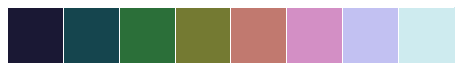

In [151]:
sns.palplot(sns.color_palette('cubehelix', 8))

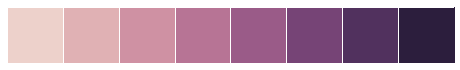

In [152]:
sns.palplot(sns.cubehelix_palette(8))

Other arguments to __cubehelix_palette()__ control how the palette looks. The two main things you’ll change are the __start__ (a value between 0 and 3) and __rot__, or number of rotations (an arbitrary value, but probably within -1 and 1),

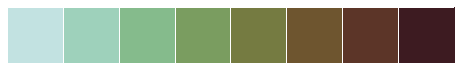

In [153]:
sns.palplot(sns.cubehelix_palette(8, start=0.5, rot=0.75))

You can also control how __dark__ and __light__ the endpoints are and even __reverse the ramp__:

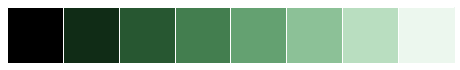

In [154]:
sns.palplot(sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=0.95, reverse=True))

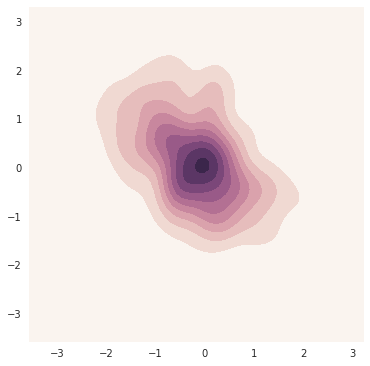

In [162]:
x, y = np.random.multivariate_normal([0, 0], [[1, -0.5], [-0.5, 1]], size=300).T
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.kdeplot(x, y, cmap=cmap, shade=True);

__Custom sequential palettes with light_palette() and dark_palette()__

For a simpler interface to custom sequential palettes, you can use __light_palette()__ or __dark_palette()__, which are both seeded with a single color and produce a palette that ramps either from light or dark desaturated values to that color. These functions are also accompanied by the __choose_light_palette()__ and __choose_dark_palette()__ functions that launch interactive widgets to create these palettes.

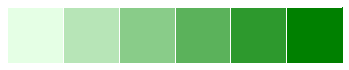

In [163]:
sns.palplot(sns.light_palette('green'))

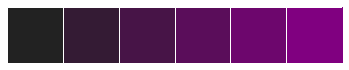

In [164]:
sns.palplot(sns.dark_palette('purple'))

__reverse the palette__

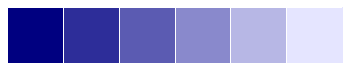

In [166]:
sns.palplot(sns.light_palette('navy', reverse=True))

__create colormap objects rather than lists of colors__

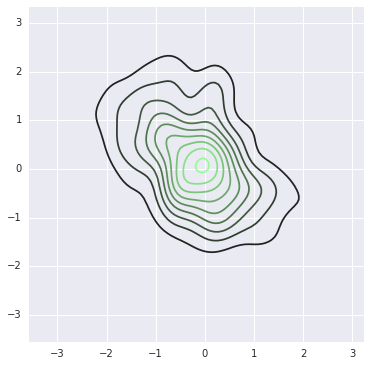

In [167]:
pal = sns.dark_palette("palegreen", as_cmap=True)
sns.kdeplot(x, y, cmap=pal);

By default, the input can be any valid matplotlib color. Alternate interpretations are controlled by the __input__ argument. Currently you can provide tuples in hls or husl space along with the default rgb, and you can also seed the palette with any valid xkcd color.

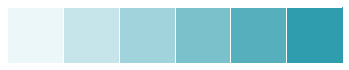

In [101]:
sns.palplot(sns.light_palette((210, 90, 60), input="husl"))

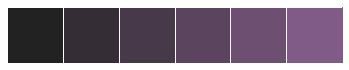

In [102]:
sns.palplot(sns.dark_palette("muted purple", input="xkcd"))

### Diverging  color palettes

These are used for data where both large low and high values are interesting. There is also usually a well-defined midpoint in the data. For instance, if you are plotting changes in temperature from some baseline timepoint, it is best to use a diverging colormap to show areas with relative decreases and areas with relative increases.

It’s also important to emphasize here that using red and green should be avoided, as a substantial population of potential viewers will be unable to distinguish them.

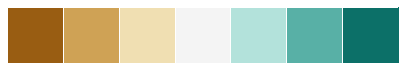

In [104]:
sns.palplot(sns.color_palette("BrBG", 7))

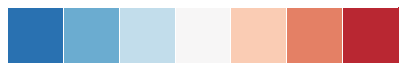

In [105]:
sns.palplot(sns.color_palette("RdBu_r", 7))

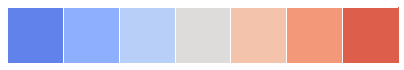

In [106]:
sns.palplot(sns.color_palette("coolwarm", 7))

__Custom diverging palettes with diverging_palette()__

You can also use the seaborn function __diverging_palette()__ to create a custom colormap for diverging data. (Naturally there is also a companion interactive widget, __choose_diverging_palette()__). 

This function makes diverging palettes using the __husl__ color system. You pass it __two hues (in degreees)__ and, optionally, the __lightness__ and __saturation__ values for the extremes. 

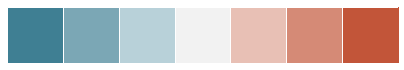

In [190]:
sns.palplot(sns.diverging_palette(220, 20, n=7))

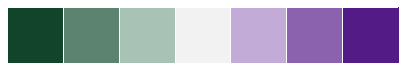

In [109]:
sns.palplot(sns.diverging_palette(145, 280, s=85, l=25, n=7))

The __sep__ argument controls the width of the separation between the two ramps in the middle region of the palette.

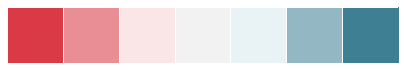

In [110]:
sns.palplot(sns.diverging_palette(10, 220, sep=80, n=7))

The parameter __center__ make a palette with the midpoint is dark rather than light.

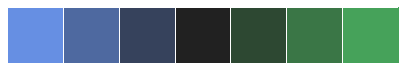

In [111]:
sns.palplot(sns.diverging_palette(255, 133, l=60, n=7, center="dark"))

__Changing default palettes with set_palette()__

The __color_palette()__ function has a companion called __set_palette()__. The relationship between them is similar to the pairs covered in the aesthetics tutorial. __set_palette()__ accepts the same arguments as __color_palette()__, but it changes the default matplotlib parameters so that the palette is used for all plots.

In [112]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

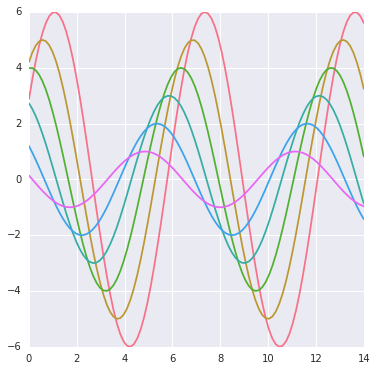

In [113]:
sns.set_palette("husl")
sinplot()

The __color_palette()__ function can also be used in a with statement to temporarily change the color palette.

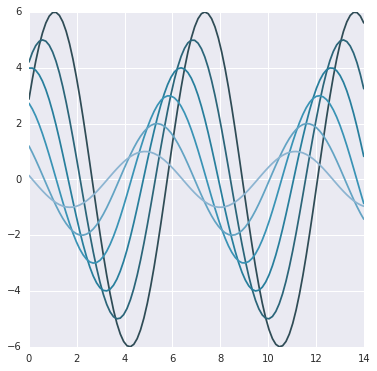

In [168]:
with sns.color_palette("PuBuGn_d"):
    sinplot()

### Interactive color palette:

In [ ]:
sns.choose_colorbrewer_palette()

In [ ]:
sns.choose_cubehelix_palette()

In [ ]:
sns.choose_dark_palette()

In [ ]:
sns.choose_light_palette()

[array([ 0.25199714,  0.49873371,  0.57516028,  1.        ]),
 array([ 0.43026136,  0.62000665,  0.67878019,  1.        ]),
 array([ 0.60852558,  0.74127959,  0.7824001 ,  1.        ]),
 array([ 0.7867898 ,  0.86255253,  0.88602001,  1.        ]),
 array([ 0.95,  0.95,  0.95,  1.  ]),
 array([ 0.95457726,  0.76653099,  0.78032569,  1.        ]),
 array([ 0.91971827,  0.58735877,  0.61174   ,  1.        ]),
 array([ 0.88485928,  0.40818655,  0.44315432,  1.        ]),
 array([ 0.85104086,  0.23436275,  0.27960104,  1.        ])]

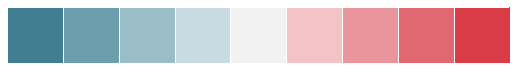

In [175]:
sns.choose_diverging_palette()